# 🏦 Credit Risk Analysis and Default Prediction

## 1. Introduction
The goal of this project is to build a machine learning model to predict the probability of a client defaulting on a loan (`Risk_Flag`).

**Key Stages:**
1. **Exploratory Data Analysis (EDA)** - understanding distributions and correlations.
2. **Preprocessing** - encoding categorical variables, scaling, and data splitting.
3. **Modelling** - testing different algorithms (Logistic Regression, Random Forest, Gradient Boosting).
4. **Evaluation** - selecting appropriate metrics for imbalanced data.
5. **Business Logic** - simulating a decision engine (Accept/Review/Reject).

## 2. Data Loading and Overview
We load the dataset and check basic information: data types, missing values, and duplicates.

In [252]:
data_dir = "data/Loan Prediction.csv"

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_auc_score, average_precision_score,precision_score, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [254]:
df = pd.read_csv(data_dir)

In [255]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [257]:
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [258]:
df.drop_duplicates()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [259]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


We remove columns that do not contribute predictive value or have too many unique nominal values (e.g., `Id`, `CITY`, `STATE`), which could lead to model overfitting.

In [260]:
df_wanted = df.drop(columns=['Id', 'CITY', 'STATE'])
target = df_wanted['Risk_Flag']

In [261]:
df_wanted.drop(columns=['Risk_Flag'], inplace=True)

## 3. Exploratory Data Analysis (EDA)
We examine the distribution of key demographic and financial features of the clients. The `Profession` variable has many categories and will be analyzed separately.

In [262]:
cat_cols = df_wanted.select_dtypes(exclude="number").columns
print(cat_cols)

Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession'], dtype='object')


In [263]:
cat_cols_for_vis = cat_cols.drop('Profession')

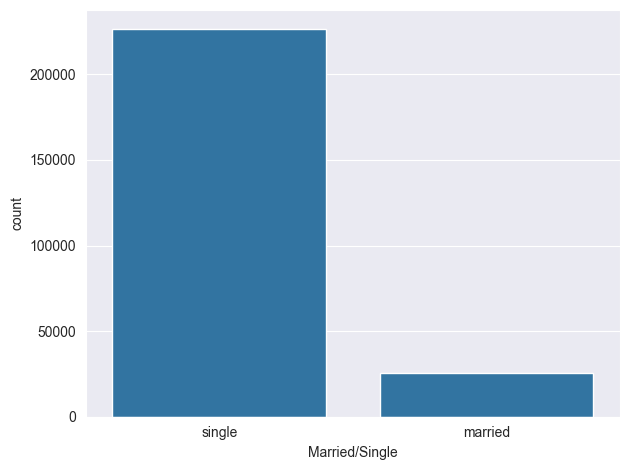

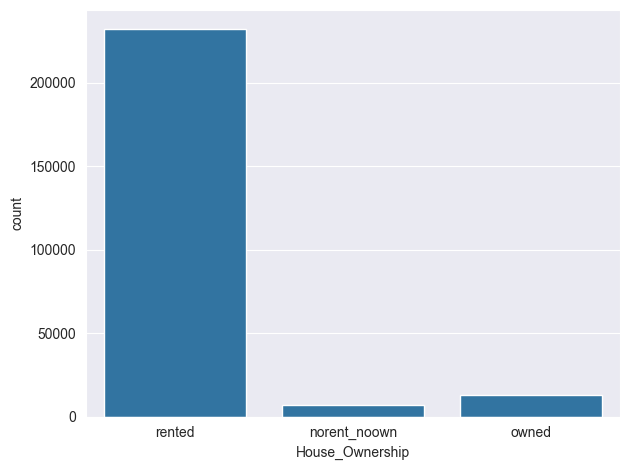

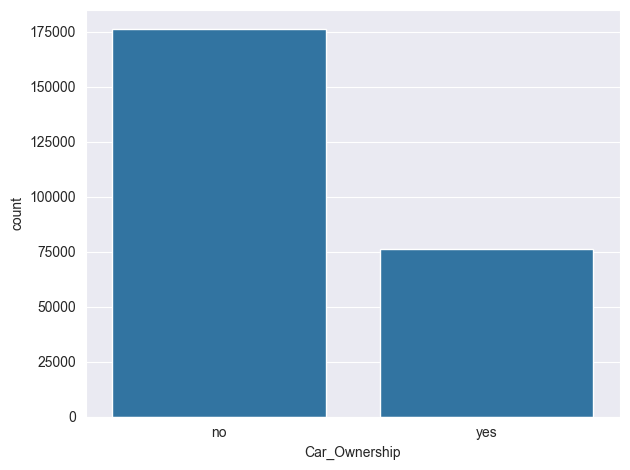

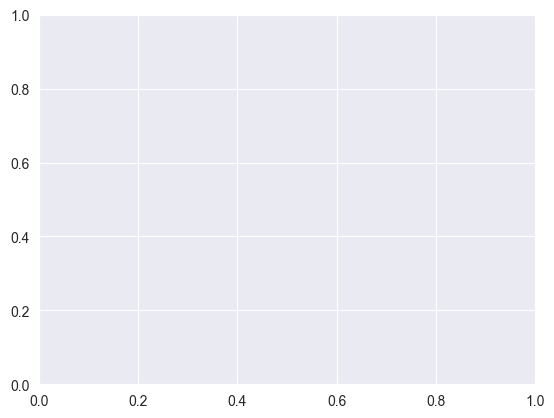

In [264]:
for k in cat_cols_for_vis:
    sns.countplot(x=df[k])
    plt.tight_layout()
    plt.subplots()

### Numerical Variable Analysis
We check the distribution of age and the correlation between numerical variables and the target variable.

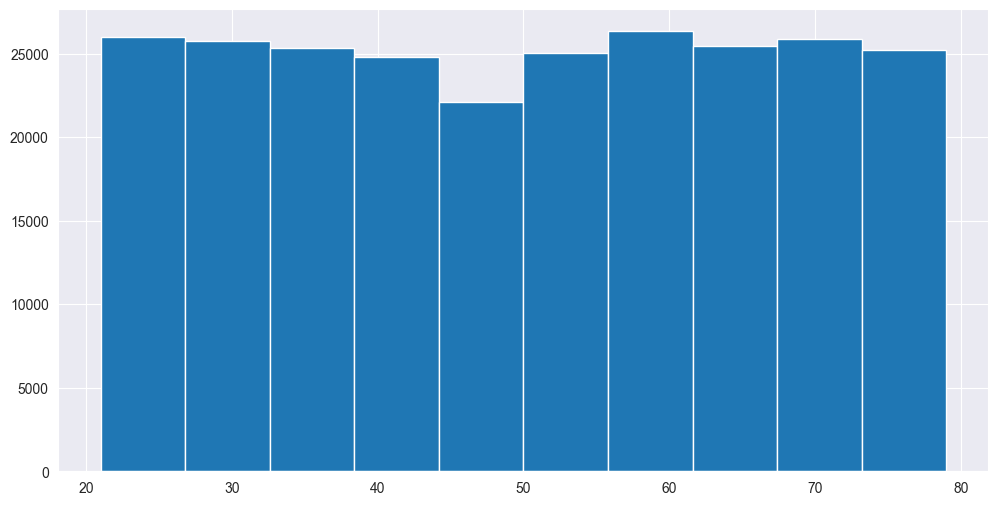

In [265]:
plt.figure(figsize=(12, 6))
plt.hist(x=df['Age'])
plt.show()

In [266]:
num_cols = df_wanted.drop(cat_cols, axis=1)
print(num_cols)

         Income  Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS
0       1303834   23           3                3                 13
1       7574516   40          10                9                 13
2       3991815   66           4                4                 10
3       6256451   41           2                2                 12
4       5768871   47          11                3                 14
...         ...  ...         ...              ...                ...
251995  8154883   43          13                6                 11
251996  2843572   26          10                6                 11
251997  4522448   46           7                7                 12
251998  6507128   45           0                0                 10
251999  9070230   70          17                7                 11

[252000 rows x 5 columns]


**Correlation Matrix:** Allows identification of correlation between numerical features.

<Axes: >

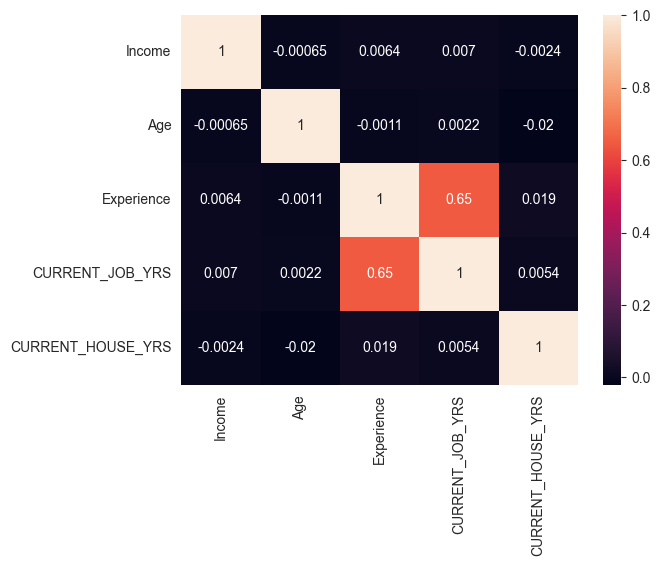

In [267]:
correlation_matrix = num_cols.corr()
sns.heatmap(data=correlation_matrix, annot=True)

<Axes: ylabel='Income'>

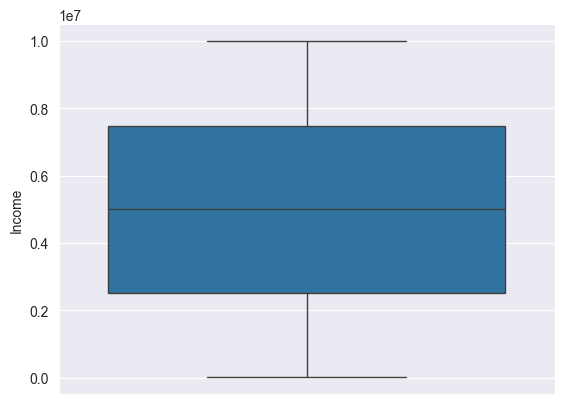

In [268]:
sns.boxplot(y=df_wanted['Income'])

In [269]:
print(num_cols)


         Income  Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS
0       1303834   23           3                3                 13
1       7574516   40          10                9                 13
2       3991815   66           4                4                 10
3       6256451   41           2                2                 12
4       5768871   47          11                3                 14
...         ...  ...         ...              ...                ...
251995  8154883   43          13                6                 11
251996  2843572   26          10                6                 11
251997  4522448   46           7                7                 12
251998  6507128   45           0                0                 10
251999  9070230   70          17                7                 11

[252000 rows x 5 columns]


In [270]:
print(cat_cols)

Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession'], dtype='object')


## 4. Preprocessing
### Handling Categorical Variables
For the `Profession` variable (51 unique values), we will use **One-Hot Encoding** to help the model interpret differences between professions. Other categorical variables (binary or ordinal) will be encoded using **Label Encoding**.

In [271]:
df_wanted['Profession'].nunique()

51

In [272]:
df_wanted['Profession'].value_counts()

Profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer   

In [273]:
df_dummies = pd.get_dummies(data=df_wanted, columns=['Profession'])

In [274]:
def preprocess_categorical(categorical_df):
    return categorical_df.apply(LabelEncoder().fit_transform)

In [275]:
categorical_preprocessed = preprocess_categorical(df_dummies[cat_cols_for_vis])

In [276]:
df_rest = df_dummies.drop(columns=cat_cols_for_vis)

df_all = pd.concat([df_rest.reset_index(drop=True), categorical_preprocessed.reset_index(drop=True)],axis=1)

print(df_all.shape)
print(df_all.head())


(252000, 59)
    Income  Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0  1303834   23           3                3                 13   
1  7574516   40          10                9                 13   
2  3991815   66           4                4                 10   
3  6256451   41           2                2                 12   
4  5768871   47          11                3                 14   

   Profession_Air_traffic_controller  Profession_Analyst  \
0                              False               False   
1                              False               False   
2                              False               False   
3                              False               False   
4                              False               False   

   Profession_Architect  Profession_Army_officer  Profession_Artist  ...  \
0                 False                    False              False  ...   
1                 False                    False              False  ..

In [277]:
X = df_all
y = target

In [278]:
X = X.astype(int)

In [279]:
print(X)

         Income  Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0       1303834   23           3                3                 13   
1       7574516   40          10                9                 13   
2       3991815   66           4                4                 10   
3       6256451   41           2                2                 12   
4       5768871   47          11                3                 14   
...         ...  ...         ...              ...                ...   
251995  8154883   43          13                6                 11   
251996  2843572   26          10                6                 11   
251997  4522448   46           7                7                 12   
251998  6507128   45           0                0                 10   
251999  9070230   70          17                7                 11   

        Profession_Air_traffic_controller  Profession_Analyst  \
0                                       0                   0   
1    

### Data Splitting and Scaling
1. **Stratification (`stratify=y`)**: Crucial for imbalanced data, ensuring the same proportion of the `1` class (risk) in both training and test sets.
2. **Scaling (`StandardScaler`)**: We fit the scaler (`fit`) **only** on the training set to avoid Data Leakage, and then transform the validation and test sets.

In [280]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5. Modelling and Evaluation
We test three different algorithms:
1. **Logistic Regression** - as a simple baseline.
2. **Random Forest** - an ensemble model, resistant to noise.
3. **Gradient Boosting** - a powerful boosting model.

Due to class imbalance (few default cases), we use the `class_weight='balanced'` parameter and focus on **Precision-Recall AUC** and **F1-Score** metrics, rather than just Accuracy.

In [281]:
def evaluate_binary(model, X_tr, y_tr, X_va, y_va, threshold=0.2):

    X_tr = np.array(X_tr)
    X_va = np.array(X_va)
    y_tr = np.array(y_tr)
    y_va = np.array(y_va)
    model.fit(X_tr, y_tr)

    if hasattr(model, "predict_proba"):
        p = model.predict_proba(X_va)[:, 1]
    else:
        scores = model.decision_function(X_va)
        p = (scores - scores.min()) / (scores.max() - scores.min() + 1e-12)

    y_pred = (p >= threshold).astype(int)

    out = {
        "roc_auc": roc_auc_score(y_va, p),
        "pr_auc": average_precision_score(y_va, p),
        "precision": precision_score(y_va, y_pred, zero_division=0),
        "recall": recall_score(y_va, y_pred, zero_division=0),
        "f1": f1_score(y_va, y_pred, zero_division=0),
        "threshold": threshold
    }

    cm = confusion_matrix(y_va, y_pred)
    out["tn"], out["fp"], out["fn"], out["tp"] = cm.ravel()
    return out

models = {
    "LogReg": LogisticRegression(max_iter=2000, n_jobs=None),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    "GB": GradientBoostingClassifier(random_state=42),
}

results = []
for name, model in models.items():
    metrics = evaluate_binary(model, X_train, y_train, X_valid, y_valid, threshold=0.2)
    metrics["model"] = name
    results.append(metrics)

results_df = pd.DataFrame(results).set_index("model").sort_values("pr_auc", ascending=False)
results_df

,roc_auc,pr_auc,precision,recall,f1,threshold,tn,fp,fn,tp
model,,,,,,,,,,
GB,0.525765,0.131043,0.000000,0.000000,0.000000,0.2,44201,0,6199,0
LogReg,0.501448,0.124652,0.000000,0.000000,0.000000,0.2,44201,0,6199,0
RandomForest,0.484934,0.118194,0.122234,0.963381,0.216943,0.2,1316,42885,227,5972


### Final Model Training
Based on the results (highest `PR AUC`), we select **Random Forest**.
We train it on the combined training and validation sets to utilize as much data as possible before the final test.

In [282]:
best_model = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)

X_trainval = np.concatenate([X_train, X_valid], axis=0)
y_trainval = np.concatenate([y_train, y_valid], axis=0)

best_model.fit(X_trainval, y_trainval)

metrics = evaluate_binary(best_model, X_trainval, y_trainval, X_test, y_test, threshold=0.2)

results_df_final = pd.DataFrame([metrics]).sort_values("pr_auc", ascending=False)
results_df_final

,roc_auc,pr_auc,precision,recall,f1,threshold,tn,fp,fn,tp
0,0.935381,0.58309,0.481416,0.831586,0.609807,0.2,38648,5553,1044,5155


In [283]:
print(results_df_final)

    roc_auc   pr_auc  precision    recall        f1  threshold     tn    fp  \
0  0.935381  0.58309   0.481416  0.831586  0.609807        0.2  38648  5553   

     fn    tp  
0  1044  5155  


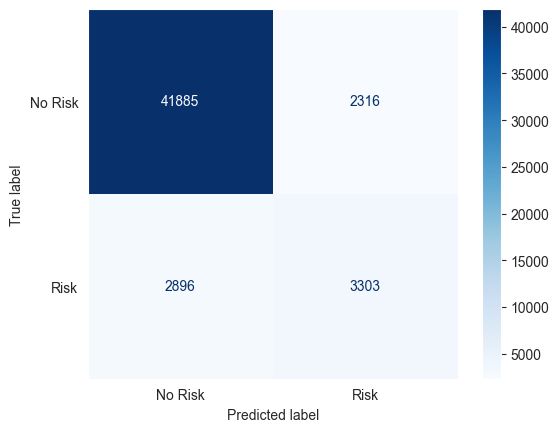

In [284]:
cm = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(cm, display_labels=["No Risk", "Risk"])
disp.plot(cmap="Blues")
plt.gca().grid(False)
plt.show()


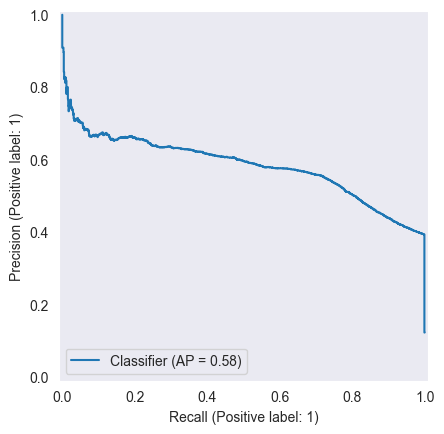

In [285]:
y_score = best_model.predict_proba(X_test)[:, 1]
ap = average_precision_score(y_test, y_score)
disp = PrecisionRecallDisplay.from_predictions(y_test, y_score)
ax = plt.gca()
ax.grid(False)
plt.show()

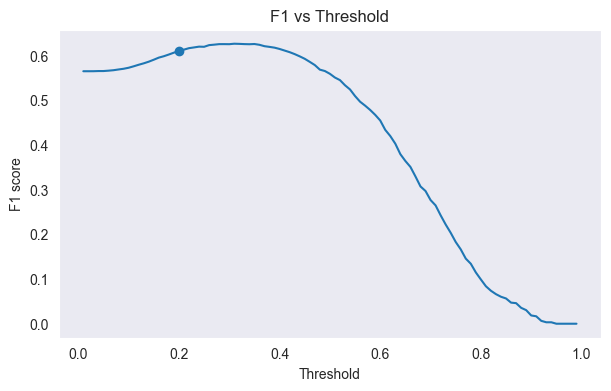

In [286]:
thresholds = np.linspace(0.01, 0.99, 99)
f1s = []
for t in thresholds:
    y_pred = (y_score >= t).astype(int)
    f1s.append(f1_score(y_test, y_pred))

plt.figure(figsize=(7,4))
plt.plot(thresholds, f1s)
plt.xlabel("Threshold")
plt.ylabel("F1 score")
plt.title("F1 vs Threshold")

t_star = 0.2
y_pred_star = (y_score >= t_star).astype(int)
f1_star = f1_score(y_test, y_pred_star)
plt.scatter([t_star], [f1_star])
plt.gca().grid(False)
plt.show()

## 6. Decision System (Business Logic)
Instead of a binary classification (Yes/No), we introduce a buffer zone.
* **ACCEPT (0 - 10%)**: Automatic acceptance.
* **REVIEW (10% - 30%)**: Manual verification by an analyst required.
* **REJECT (> 30%)**: Automatic rejection.

The analysis below shows what percentage of risky clients (True Positive) fall into each bucket.

In [287]:
pd_score = y_score
t1, t2 = 0.10, 0.30
def decision(pd_score, t1, t2):
    if pd_score < t1:
        return 'ACCEPT'
    elif pd_score < t2:
        return 'REVIEW'
    else:
        return  'REJECT'
decisions = np.array([decision(p, t1, t2) for p in pd_score])

out = pd.DataFrame({
    "pd" : pd_score,
    "true" : y_test.values,
    "decision" : decisions
})
share = out["decision"].value_counts(normalize=True).rename("share").to_frame()
share["count"] = out["decision"].value_counts()
share

,share,count
decision,,
ACCEPT,0.708790,35723
REJECT,0.170159,8576
REVIEW,0.121052,6101


In [288]:
risk = out[out["true"] == 1]
caught = (risk["decision"].isin(["REJECT", "REVIEW"])).mean()
missed = (risk["decision"] == "ACCEPT").mean()
print("Caught:", caught, "Missed:", missed)

Caught: 0.9640264558799806 Missed: 0.03597354412001936


## 7. Model Interpretability (Feature Importance)
We investigate which features had the greatest impact on the model's decision. This helps understand what drives credit risk.

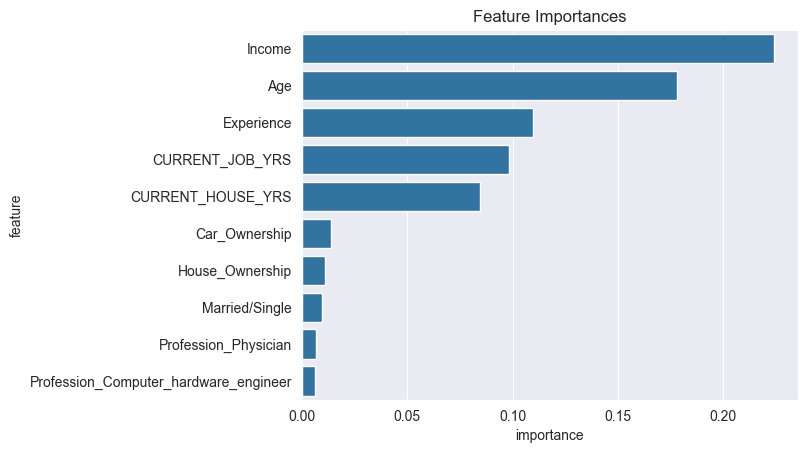

In [289]:
importances = best_model.feature_importances_
feature_names = df_all.columns
fi_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})
fi_df = fi_df.sort_values(by='importance', ascending=False).head(10)

sns.barplot(x='importance', y='feature', data=fi_df)
plt.title('Feature Importances')
plt.show()

In [290]:
import joblib

In [291]:
joblib.dump(best_model, 'loan_risk_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
model_columns = df_all.columns.tolist()
joblib.dump(model_columns, 'model_columns.joblib')



✅ Wszystkie pliki zostały zapisane: model, skaler i lista kolumn.
